In [95]:
"""
Name: Subah Mehrotra
"""
import pandas 
import numpy as np
Data1 = pandas.read_csv('dataset1.csv', sep=' ')
Data2 = pandas.read_csv('dataset2.csv', sep=' ')
display(Data1)
#display(Data2) 
data1 = np.array(Data1)
data1.shape
print(data1)

,8.228429240780527065e-01,1.135491058107753304e+00
0,1.292526,1.600180
1,0.869815,1.370494
2,2.097264,1.710771
3,2.024974,3.001641
4,1.799584,0.174340
...,...,...
3494,-9.640661,2.292388
3495,-6.330002,2.498485
3496,-5.406370,2.119176
3497,-5.362496,2.165512


[[ 1.29252552  1.6001803 ]
 [ 0.86981497  1.37049416]
 [ 2.09726383  1.71077141]
 ...
 [-5.40637045  2.11917622]
 [-5.36249572  2.16551228]
 [-7.02772125  2.58823058]]


In [6]:
# Part 1.1: Lloyd’s algorithm with uniform random initialization
#Reference: https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
import random

def cluster_points(X, mu):
    clusters ={}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
def reeval_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return(set([tuple(a) for a in mu]))==set([tuple(a) for a in oldmu])

def find_centers(X, k):

    oldmu = random.sample(X, k)
    mu = random.sample(X, k)
    count = 0

    while not has_converged(mu, oldmu):
        oldmu = mu
        print(oldmu)
        clusters = cluster_points(X, mu)
        mu = reeval_centers(oldmu, clusters)
    return( mu, clusters)


In [7]:
#NumOfClust = [2,8,14,20,26,40]
NumOfClust = [2,3,4,5,6,7,8]
LL = []
for k in NumOfClust:
    mu, clusters = find_centers(list(data1), k)
    lloyds_labels = []
    for point_set in data1:
        listOf_point_set = list(point_set)
        for elem in clusters:
            for i in range(len(clusters[elem])):
                listofelem = list(clusters[elem][i])
                if(listofelem == listOf_point_set):
                    lloyds_labels.append(elem)
    LL.append(lloyds_labels)

[array([ 0.44927478, -4.09631238]), array([-0.0358892 ,  0.72222684])]
[array([ 0.73164557, -2.58614269]), array([-0.98660785,  0.41310893])]
[array([ 0.72544873, -2.07839748]), array([-1.31831389,  0.71831434])]
[array([ 0.6744276 , -1.73903244]), array([-1.60786155,  0.89842564])]
[array([ 0.65334735, -1.37850692]), array([-2.08609058,  1.04793231])]
[array([ 0.64873467, -0.90502186]), array([-3.34602703,  1.12233839])]
[array([ 0.50975865, -0.70192272]), array([-4.85328571,  1.37470687])]
[array([ 0.37174276, -0.66984378]), array([-5.79482267,  1.85456658])]
[array([ 0.33679599, -0.65753764]), array([-6.03738548,  1.96558648])]
[array([ 0.32580845, -0.65183817]), array([-6.11184114,  1.98914551])]
[array([ 0.32387397, -0.65046103]), array([-6.12606242,  1.99145492])]
[array([-5.98380533,  1.47643294]), array([-0.94216751, -0.43596982]), array([-1.25734269, -1.02591228])]
[array([-6.24853262,  2.01446739]), array([0.58461077, 0.26025989]), array([-0.14121464, -2.07122264])]
[array([-

[array([ 0.8703657 , -2.79198594]), array([1.16709929, 1.26000846]), array([ 0.69424615, -0.99938332]), array([-6.29365994,  2.02272976]), array([-1.33964073, -0.6000979 ])]
[array([ 0.88061308, -2.8057933 ]), array([1.16643324, 1.25737191]), array([ 0.68099962, -1.01838472]), array([-6.29365994,  2.02272976]), array([-1.34385438, -0.59567193])]
[array([ 0.88122726, -2.81313603]), array([1.1637526 , 1.25098073]), array([ 0.67851351, -1.03387575]), array([-6.29365994,  2.02272976]), array([-1.34597922, -0.59360814])]
[array([ 0.87937715, -2.82679306]), array([1.15928992, 1.24498883]), array([ 0.68116658, -1.05482633]), array([-6.29365994,  2.02272976]), array([-1.34796803, -0.59098748])]
[array([ 0.88388509, -2.83534462]), array([1.15767847, 1.23977397]), array([ 0.67626066, -1.07171591]), array([-6.29365994,  2.02272976]), array([-1.34853605, -0.58779365])]
[array([ 0.88956187, -2.84223473]), array([1.15597767, 1.23734621]), array([ 0.67019398, -1.08442904]), array([-6.29365994,  2.022

[array([ 1.47102338, -0.77948694]), array([ 0.79940481, -2.93422599]), array([-6.00551136,  1.96600341]), array([-1.01281526, -0.79599209]), array([1.17972385, 1.90618092]), array([1.08600757, 0.73523417]), array([ 0.98948092, -1.55236393])]
[array([ 1.31000677, -0.69524489]), array([ 0.82985077, -3.06359551]), array([-6.21319612,  2.01460135]), array([-1.18266326, -0.71055637]), array([1.38482154, 1.88584373]), array([0.89622145, 0.68478329]), array([ 0.80630875, -1.64732305])]
[array([ 1.2119917 , -0.69867625]), array([ 0.90671684, -3.15541756]), array([-6.27968808,  2.0234607 ]), array([-1.2757371 , -0.65065418]), array([1.52831869, 1.82973618]), array([0.75544956, 0.69057325]), array([ 0.65985427, -1.74124889])]
[array([ 1.20202093, -0.74614964]), array([ 0.98573076, -3.21596735]), array([-6.28570016,  2.02499435]), array([-1.33269271, -0.61366038]), array([1.60879661, 1.7593932 ]), array([0.64569222, 0.70883981]), array([ 0.51078886, -1.80107184])]
[array([ 1.20964338, -0.79304783

[array([ 0.96186234, -1.48252207]), array([ 0.92809756, -3.14276908]), array([-6.44181495,  2.03424434]), array([-2.08774197,  0.36540914]), array([1.5502633 , 1.64252742]), array([0.57038159, 0.4778964 ]), array([-0.95492488, -1.18162926])]
[array([ 0.96011353, -1.48376609]), array([ 0.92809756, -3.14276908]), array([-6.44181495,  2.03424434]), array([-2.08774197,  0.36540914]), array([1.5502633 , 1.64252742]), array([0.57038159, 0.4778964 ]), array([-0.95614238, -1.18000371])]
[array([1.67894666, 1.41807576]), array([0.52477915, 0.68586428]), array([0.90633585, 0.51705381]), array([-7.57932211,  1.44220879]), array([-0.52632203, -1.36200332]), array([1.34488814, 0.32182785]), array([-2.26949988,  0.45460746]), array([1.05561762, 1.03341343])]
[array([1.76666612, 1.78574274]), array([0.08433175, 0.60877961]), array([0.77036804, 0.18113878]), array([-6.73488566,  2.02048727]), array([ 0.07805909, -1.88134574]), array([ 1.45547156, -0.60742956]), array([-2.43019692,  0.50338343]), array

[array([1.63077278, 1.66255838]), array([-0.97734165, -1.1398319 ]), array([ 1.00430082, -0.42764413]), array([-6.45145646,  2.03809191]), array([ 0.93948043, -3.35877445]), array([ 0.88352226, -1.87169147]), array([-2.18237722,  0.40064974]), array([0.41725603, 0.81318457])]
[array([1.63077278, 1.66255838]), array([-0.98064993, -1.14123809]), array([ 1.01272876, -0.43990953]), array([-6.45145646,  2.03809191]), array([ 0.94015836, -3.36591705]), array([ 0.88005283, -1.88056607]), array([-2.18114085,  0.40625789]), array([0.41586028, 0.80598615])]
[array([1.63077278, 1.66255838]), array([-0.98192757, -1.14039383]), array([ 1.01686529, -0.44678777]), array([-6.45145646,  2.03809191]), array([ 0.94344952, -3.37300381]), array([ 0.87679298, -1.8882967 ]), array([-2.18241187,  0.40992257]), array([0.41510674, 0.80390017])]
[array([1.63077278, 1.66255838]), array([-0.98422968, -1.13851293]), array([ 1.01516482, -0.45561938]), array([-6.45145646,  2.03809191]), array([ 0.95092045, -3.3799916

[array([1.58517392, 1.64684494]), array([-1.00680849, -1.11922499]), array([ 1.12563126, -0.58904002]), array([-6.45145646,  2.03809191]), array([ 0.96125515, -3.39388727]), array([ 0.81689643, -1.93730836]), array([-2.21137358,  0.4549302 ]), array([0.39800206, 0.68221675])]
[array([1.58517392, 1.64684494]), array([-1.00889987, -1.11761977]), array([ 1.12563126, -0.58904002]), array([-6.45145646,  2.03809191]), array([ 0.96125515, -3.39388727]), array([ 0.81545536, -1.93607424]), array([-2.21462425,  0.45741577]), array([0.39800206, 0.68221675])]
[array([1.58517392, 1.64684494]), array([-1.01324767, -1.11347255]), array([ 1.12563126, -0.58904002]), array([-6.45145646,  2.03809191]), array([ 0.96125515, -3.39388727]), array([ 0.80990897, -1.93517707]), array([-2.22264133,  0.46077198]), array([0.39524741, 0.68150539])]
[array([1.58517392, 1.64684494]), array([-1.01408842, -1.10975823]), array([ 1.1280504 , -0.58759103]), array([-6.45145646,  2.03809191]), array([ 0.9637591 , -3.3960859

[array([1.58017511, 1.63873659]), array([-1.2922608 , -0.77241528]), array([ 1.18160989, -0.66058904]), array([-7.27252009,  2.00645983]), array([ 1.04612222, -3.31182507]), array([ 0.54278917, -1.90127011]), array([-4.37518296,  1.96634552]), array([0.38742488, 0.67848497])]
[array([1.58162913, 1.63959767]), array([-1.31337704, -0.74939766]), array([ 1.19827464, -0.69945363]), array([-7.36759673,  1.99924994]), array([ 1.07345086, -3.28056488]), array([ 0.46727264, -1.88879534]), array([-4.50272272,  1.986638  ]), array([0.39259588, 0.67855163])]
[array([1.58405031, 1.62986879]), array([-1.3338071 , -0.72751478]), array([ 1.20364652, -0.75474542]), array([-7.41775092,  1.99472509]), array([ 1.08679574, -3.24796938]), array([ 0.40077354, -1.87069773]), array([-4.56953741,  2.00260839]), array([0.40731378, 0.67570118])]
[array([1.58693144, 1.62703163]), array([-1.35405444, -0.70274433]), array([ 1.22004078, -0.81014613]), array([-7.45705215,  1.99021783]), array([ 1.09134454, -3.2248476

[array([1.56496761, 1.65780462]), array([-1.71561116, -0.15529793]), array([ 1.03461843, -1.48502295]), array([-7.85905622,  1.95356112]), array([ 0.94725737, -3.16285264]), array([-0.71289557, -1.38050562]), array([-5.13637522,  2.0732653 ]), array([0.59164814, 0.49877568])]
[array([1.56496761, 1.65780462]), array([-1.71561116, -0.15529793]), array([ 1.03315585, -1.48458712]), array([-7.85905622,  1.95356112]), array([ 0.94725737, -3.16285264]), array([-0.71447781, -1.38077738]), array([-5.13637522,  2.0732653 ]), array([0.59164814, 0.49877568])]
[array([1.56496761, 1.65780462]), array([-1.71661812, -0.15371005]), array([ 1.03170663, -1.48399488]), array([-7.85905622,  1.95356112]), array([ 0.94725737, -3.16285264]), array([-0.71709706, -1.38022987]), array([-5.13637522,  2.0732653 ]), array([0.59164814, 0.49877568])]
[array([1.56496761, 1.65780462]), array([-1.71698155, -0.15159176]), array([ 1.03024931, -1.4835888 ]), array([-7.85905622,  1.95356112]), array([ 0.94725737, -3.1628526

Number of custers:
2


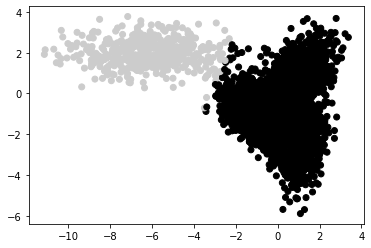

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Number of custers:")
print(NumOfClust[0])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[0], cmap=plt.cm.nipy_spectral)


Number of custers:
3


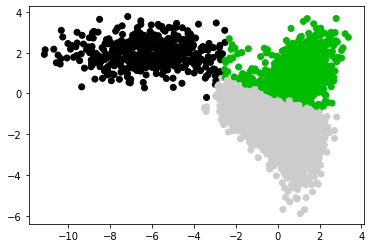

In [9]:
print("Number of custers:")
print(NumOfClust[1])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[1], cmap=plt.cm.nipy_spectral)

Number of custers:
4


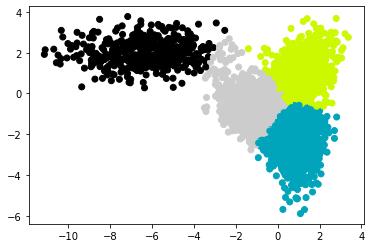

In [10]:
print("Number of custers:")
print(NumOfClust[2])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[2], cmap=plt.cm.nipy_spectral)

Number of custers:
5


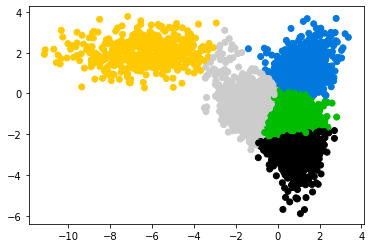

In [11]:
print("Number of custers:")
print(NumOfClust[3])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[3], cmap=plt.cm.nipy_spectral)

Number of custers:
6


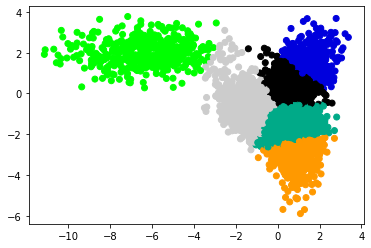

In [12]:
print("Number of custers:")
print(NumOfClust[4])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[4], cmap=plt.cm.nipy_spectral)

Number of custers:
7


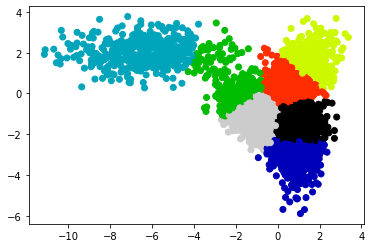

In [13]:
print("Number of custers:")
print(NumOfClust[5])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[5], cmap=plt.cm.nipy_spectral)

Number of custers:
8


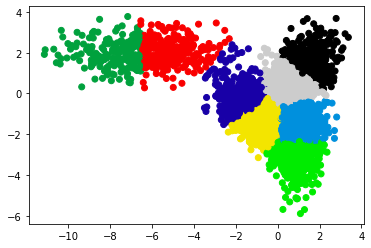

In [14]:
print("Number of custers:")
print(NumOfClust[6])
fig1 = plt.scatter(data1[:,0], data1[:,1], c=LL[6], cmap=plt.cm.nipy_spectral)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


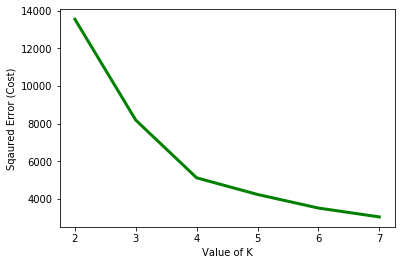

In [15]:
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
cost =[] 
for i in range(2,8): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(data1) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(2, 8), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

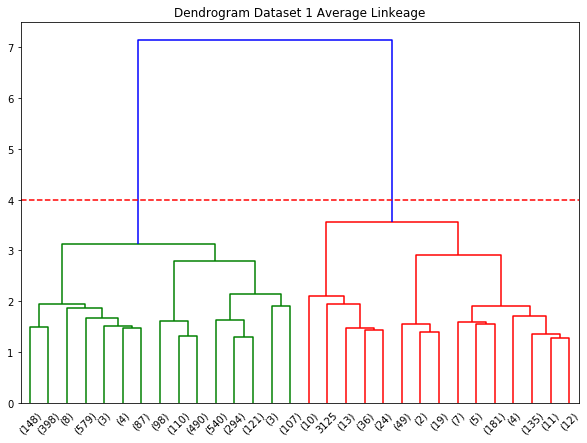

In [21]:
# Part 2.1:  Hierarchical Agglomerative Clustering with Average Linkage
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(10,7))
plt.title("Dendrogram Dataset 1 Average Linkeage")
dend = shc.dendrogram(shc.linkage(data1, method='average'), truncate_mode='lastp')
plt.axhline(y=4, color='r', linestyle='--')
plt.savefig('dataset1 average line.png')

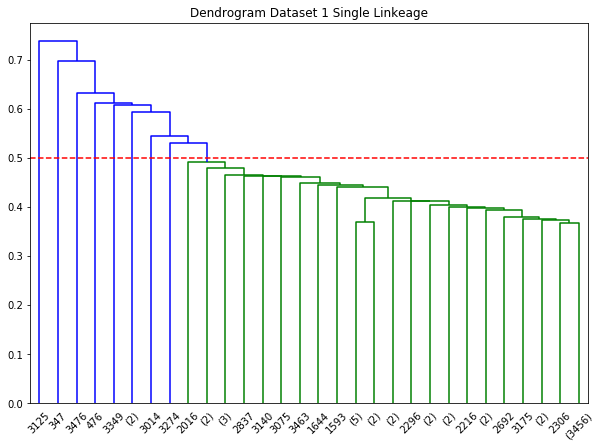

In [18]:
# Part 2.2:  Hierarchical Agglomerative Clustering with Single Linkage
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(10,7))
plt.title("Dendrogram Dataset 1 Single Linkeage")
dend = shc.dendrogram(shc.linkage(data1, method='single'), truncate_mode='lastp')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.savefig('dendrogram_dataset1_single_line.png')

In [96]:
# Part 1.2: Lloyd’s algorithm with kmeans++ initialization
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import pairwise_distances

def scatter(X, color=None, ax=None, centroids=None):
    assert X.shape[1]==2
    if color is not None:
        assert X.shape[0]==color.shape[0]
        assert len(color.shape)==1
    if not ax:
        _, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=color)
    if centroids is not None:
        ax.scatter(centroids[:,0],centroids[::,1], marker="o",s=350, c=range(centroids.shape[0]))

def init_kmeans_plus_plus(X, K):
    '''Choose the next centroids with a prior of distance.'''
    assert K>=2, "So you want to make 1 cluster?"
    compute_distance = lambda X, c: pairwise_distances(X, c).min(axis=1)
    # get the first centroid
    centroids = [X[np.random.choice(range(X.shape[0])),:]]
    # choice next
    for _ in range(K-1):
        proba = compute_distance(X,centroids)**2
        proba /= proba.sum()
        centroids.append(X[np.random.choice(range(X.shape[0]), p=proba)])      
    return np.array(centroids)

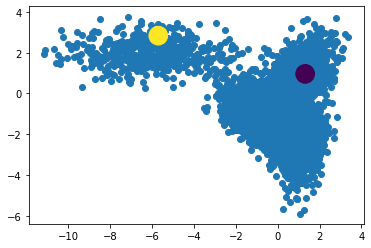

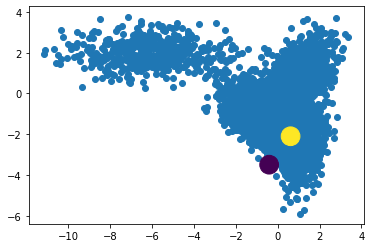

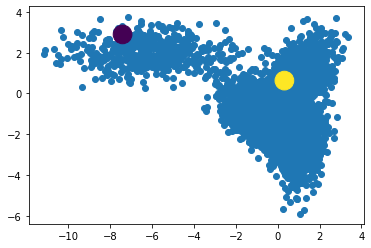

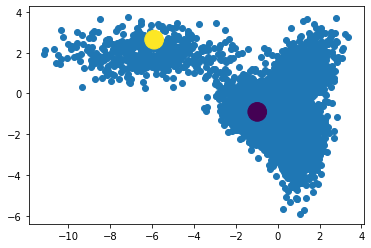

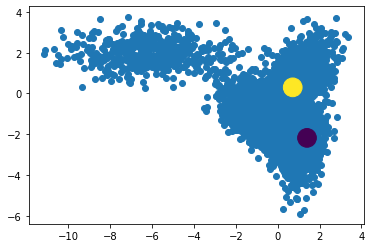

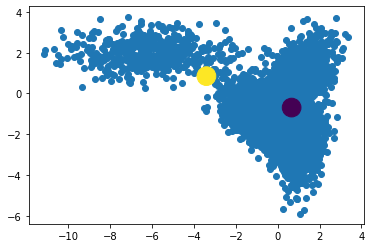

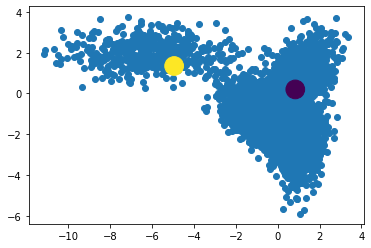

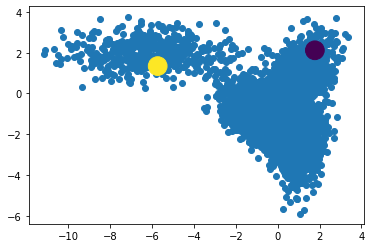

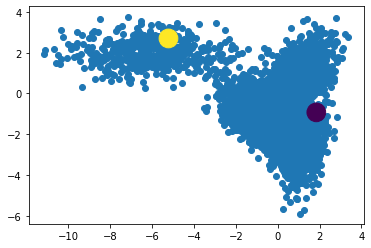

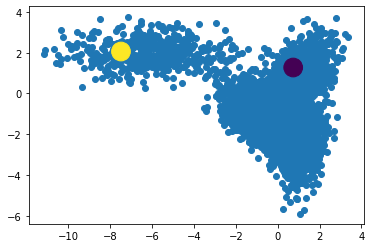

In [97]:
k=2
n_tests=10
for i in range(n_tests):
    centroids = init_kmeans_plus_plus(data1, k)
    scatter(data1, centroids=centroids)

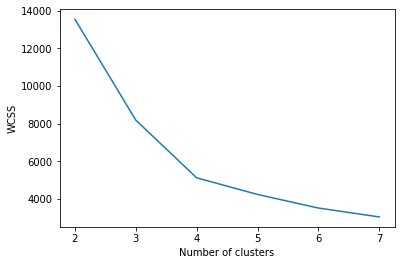

In [116]:
# Part 1.2: Lloyd’s algorithm with kmeans++ initialization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

wcss =[]
for i in range (2,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,8),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

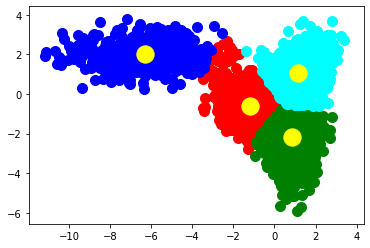

In [117]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(data1)
# Visualising the clusters

plt.scatter(data1[Y_Kmeans == 0, 0], data1[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(data1[Y_Kmeans == 1, 0], data1[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(data1[Y_Kmeans == 2, 0], data1[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(data1[Y_Kmeans == 3, 0], data1[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

#plt.scatter(data1[Y_Kmeans == 4, 0], data1[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')